In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.isin(['?']).sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [20]:
X=df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

<AxesSubplot:>

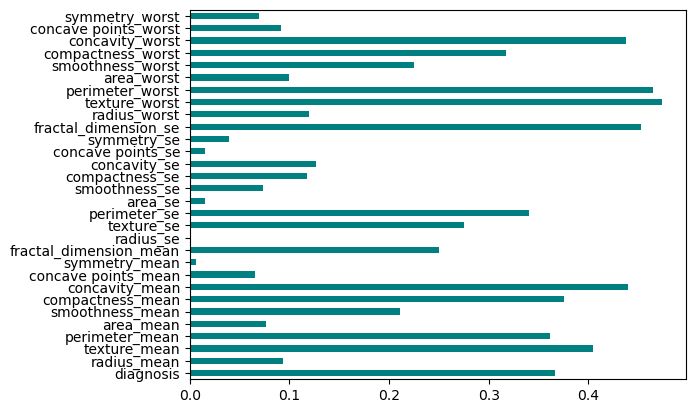

In [21]:
from sklearn.feature_selection import mutual_info_classif
imp=mutual_info_classif(X,y)
imp_f=pd.Series(imp,df.columns[0:len(df.columns)-1])
imp_f.plot(kind='barh',color="teal")

In [23]:
from sklearn.model_selection import train_test_split 
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [24]:
print("xtrain",Xtrain.shape)
print("xtest",Xtest.shape)
print("Ytrain",ytrain.shape)
print("Ytest",ytest.shape)

xtrain (455, 30)
xtest (114, 30)
Ytrain (455,)
Ytest (114,)


In [29]:
from sklearn.preprocessing import StandardScaler
imp = StandardScaler()
X_tf=imp.fit_transform(X)

In [31]:
from sklearn.decomposition import PCA
principal=PCA(n_components=4)
principal.fit_transform(X_tf)

array([[ 9.19283683,  1.94858297, -1.12316499,  3.63374231],
       [ 2.3878018 , -3.76817173, -0.52929126,  1.11826903],
       [ 5.73389628, -1.07517376, -0.55174985,  0.91207076],
       ...,
       [ 1.25617928, -1.90229668,  0.56273033, -2.08923036],
       [10.37479406,  1.67201015, -1.87703007, -2.35603763],
       [-5.4752433 , -0.67063683,  1.49044188, -2.29915986]])

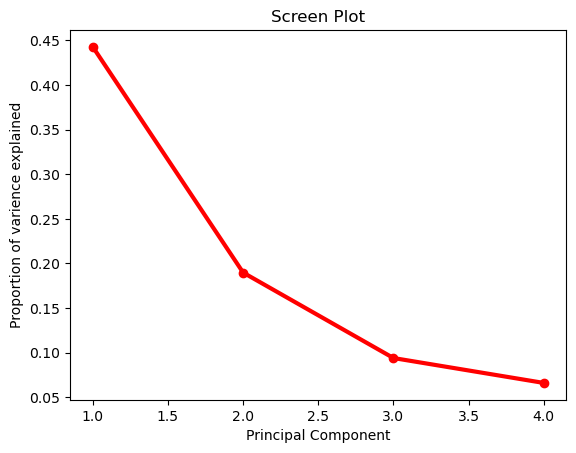

In [32]:
PC_values = np.arange(principal.n_components)+1
plt.plot(PC_values,principal.explained_variance_ratio_,'ro-',linewidth=3)
plt.title('Screen Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of varience explained')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
imp = StandardScaler()
Xtrain_tf = imp.fit_transform(Xtrain)
Xtest_tf = imp.fit_transform(Xtest)

In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5),activation="relu",solver="adam",max_iter=28,verbose=100)
mlp.fit(Xtrain_tf,ytrain)

Iteration 1, loss = 0.70268256
Iteration 2, loss = 0.67431924
Iteration 3, loss = 0.64667517
Iteration 4, loss = 0.61964007
Iteration 5, loss = 0.59407880
Iteration 6, loss = 0.56988050
Iteration 7, loss = 0.54645532
Iteration 8, loss = 0.52416193
Iteration 9, loss = 0.50285091
Iteration 10, loss = 0.48292187
Iteration 11, loss = 0.46434041
Iteration 12, loss = 0.44678292
Iteration 13, loss = 0.43014031
Iteration 14, loss = 0.41492861
Iteration 15, loss = 0.40016552
Iteration 16, loss = 0.38661585
Iteration 17, loss = 0.37440811
Iteration 18, loss = 0.36278576
Iteration 19, loss = 0.35166478
Iteration 20, loss = 0.34133274
Iteration 21, loss = 0.33159629
Iteration 22, loss = 0.32237993
Iteration 23, loss = 0.31386076
Iteration 24, loss = 0.30588508
Iteration 25, loss = 0.29802448
Iteration 26, loss = 0.29081933
Iteration 27, loss = 0.28405137
Iteration 28, loss = 0.27758616


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (28) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=5, max_iter=28, verbose=100)

In [37]:
mlp.score(Xtrain_tf,ytrain)

0.9494505494505494

In [38]:
mlp.score(Xtrain_tf,ytrain)

0.9494505494505494

In [40]:
y_pred=mlp.predict(Xtest_tf)

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
cm= confusion_matrix(ytest,y_pred)
cr= classification_report(ytest,y_pred)

In [42]:
print(cm)

[[67  4]
 [ 1 42]]


In [43]:
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

